In [1]:
%matplotlib inline
import numpy as np
import pylab as py
from scipy import misc, fftpack
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

Read the image.

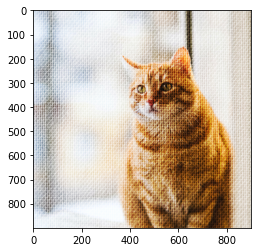

In [2]:
image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
py.imshow(image)
py.show()

Convert the image to grayscale.

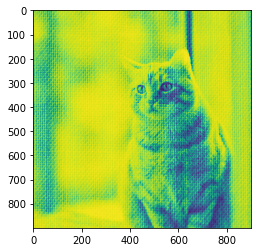

In [3]:
grayim = image[:,:,0]
py.imshow(grayim)
py.show()

Turn the image into a fourier frequency space with normalization. In order to plot, we need to get real numbers from the complex frequency, the result of the fourier transform.

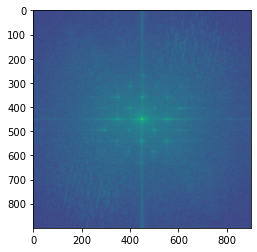

In [4]:
norm = np.sqrt(grayim.shape[0]*grayim.shape[1])
D1_im = fftpack.fft2(grayim)/norm
D2_im = fftpack.fftshift(D1_im)
abs_image = np.abs(D2_im)**0.05
py.imshow(abs_image)
py.show()

- n: Dimension
- I: Array of 1 to n
- x and y: 0-centered array
- M: Mask depending on the filter. Note that anything close to the center is low frequency.

- D1_mask = fftpack.fft2(M)/n: Fourier transform with normalization
- D2_mask = fftpack.ifft2(D1_mask)/n: Invert the fourier transform back

- f_filtered = D2_im * M: Applying the mask onto the image
- Apply Inverse Fourier Transform on f_filtered.
- Expand the result such that all values are between 0 and 255.
- Restore the shifting again with fftshift() function, otherwise the resulting image would be a blurred shifted image about the center.

Gaussian blur filter

- Blur the image which also causes the canvas to be blurred out as well.
- Create a gaussian peak at the middle.

$$
    G(x, y) = \frac{e^{- \frac{x^2+y^2}{2 \sigma^2}}}{2 \pi \sigma^2}
$$

- M: The returned value of function G()

In [5]:
def G(x, y, sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)

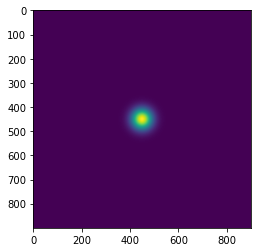

In [6]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
M = G(X, Y, 30)

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

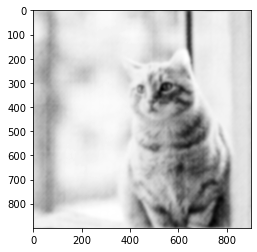

In [7]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')

High pass filter

- Get all the high frequency of the image. Thus, we will mostly get the edges, without the canvas.

- M: A boolean map where satisfied the condition = 1, otherwise = 0

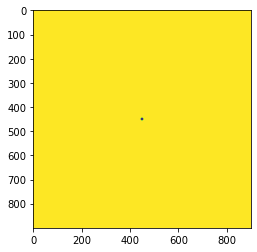

In [8]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
R = 5
M = X**2 + Y**2 > R**2

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

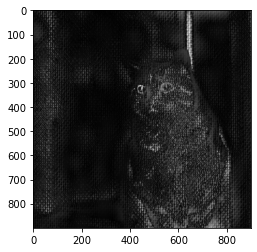

In [9]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')